<a href="https://colab.research.google.com/github/GuysBarash/PoliticalShapley/blob/main/Israeli_politics_shapley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

Mandats per party

In [1]:
prty = dict()
prty['likud'] = 30
prty['yesh_atid'] = 17
prty['meshutefet'] = 6
prty['yamina'] = 7
prty['shas'] = 9
prty['avoda'] = 7
prty['tzionot_datit'] = 6
prty['yahadut_ha_tora'] = 7
prty['israel_beitenu'] =7
prty['meretz'] = 5
prty['kahol_lavan'] = 8
prty['new_hope'] = 6
prty['raam'] = 5

Who won't sit with who (order doesnt matter)

In [2]:
disagree = dict()
disagree['likud'] = ['kahol_lavan', 'israel_beitenu', 'yesh_atid', 'avoda','meretz']
disagree['meshutefet'] = ['likud', 'tzionot_datit', 'yamina']
disagree['yesh_atid'] = ['shas', 'yahadut_ha_tora']
disagree['meretz'] = ['tzionot_datit', 'yamina']

In [3]:
print(f"This election results has {sum(prty.values())} seats total")

This election results has 120 seats total


# Code

In [4]:
!git clone https://github.com/GuysBarash/PoliticalShapley.git

fatal: destination path 'PoliticalShapley' already exists and is not an empty directory.


In [5]:
from PoliticalShapley.PoliticalShapley import PoliticalShapley
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
#include if using a jupyter notebook, remove if using a .py file
%matplotlib inline 

In [6]:
shap = PoliticalShapley()
shap.add_parties(prty)
shap.add_restrictions(disagree)
shap.run()

# possible coalitions

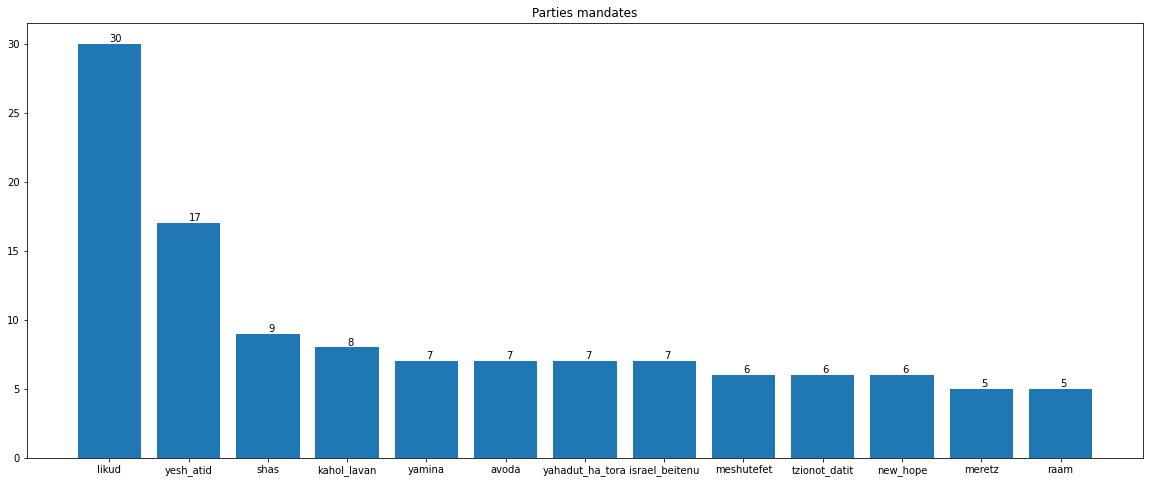

In [14]:
tuples = sorted(prty.items(), key=lambda kv: -kv[1])
names = [t[0] for t in tuples]
values = [t[1] for t in tuples]


# Set the figure size
fig = plt.figure(1, [20, 8])

#tick_label does the some work as plt.xticks()
barplot = plt.bar(range(len(prty)),values,tick_label=names)
for bar in barplot:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, yval,int(yval),va='bottom')

plt.title('Parties mandates')
plt.show()

In [ ]:
df = shap.get_possible_govt()
if df.shape[0] > 0:
  display(df)
else:
  print("No possible coalition.")

# Shapley power

In [ ]:
df = shap.get_shapley()
df = (df/df.sum()).fillna(0)
df.name='Shapley'
display(df.to_frame())

fig, ax = plt.subplots()
ax.pie(df.values, labels=df.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('')
plt.show()